## Cubic splines
Here is code for cubic spline interpolation. A cubic spline is a piecewise cubic function $s:[a,b]\to\mathbb{R}$ that is continuous and has continuous 1st and 2nd derivatives. 

In [1]:
include("cspline.jl")
using .CSpline
names(CSpline)

8-element Vector{Symbol}:
 :CSpl
 :CSpline
 :cspline_clamped
 :cspline_nak
 :cspline_nat
 :ev
 :evd
 :evdd

This implements three types of cubic splines: Natural cubic splines (`cspline_nat`) computes natural splines ($s''(a)=s''(b)=0$), clamped cubic splines (`cspline_clamped` where $s'(a)=s_0'$ and $s'(b)=s_1'$), and "not-a-knot" splines (`cspline_nak` where $s'''(x)$ is continuous at $x_1$ and $x_{n-1}$). Both the clamped and not-a-knot cubic splines have $O(h^4)$ error behavior for equally-spaced interpolation as the spacing $h\to0$.

[0.0, 0.15707963267948966, 0.3141592653589793, 0.47123889803846897, 0.6283185307179586, 0.7853981633974483, 0.9424777960769379, 1.0995574287564276, 1.2566370614359172, 1.413716694115407, 1.5707963267948966]


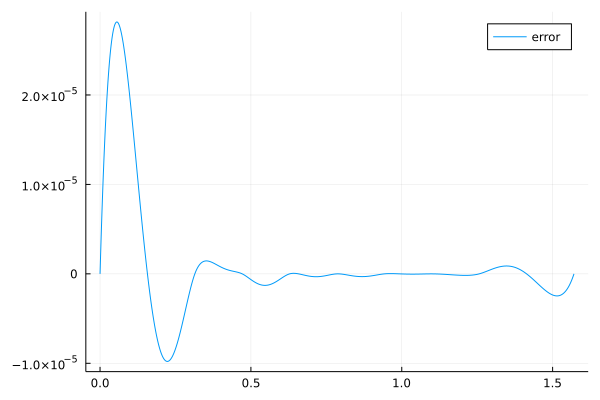

In [2]:
f(x) = cos(x)/sqrt(1+x) # function to interpolate
df(x) = (-sin(x)*sqrt(1+x)-cos(x)/(2*sqrt(1+x)))/(1+x)
a = 0.0; b = pi/2; # interpolation interval
n = 10
h = (b-a)/n
tlist = [a:.01*h:b;]
xs = a .+ h*[0:n;]
println(xs)
ys = f.(xs)
cs = CSpline.cspline_nak(xs,ys)

using Plots
plot(tlist,CSpline.ev(cs,tlist)-f.(tlist),label="error")

maxerr = [0.0005316232693169942, 6.000722189192231e-5, 5.346565606356712e-6, 4.0674186241318466e-7, 2.8199439672249582e-8, 1.8589197958718273e-9]


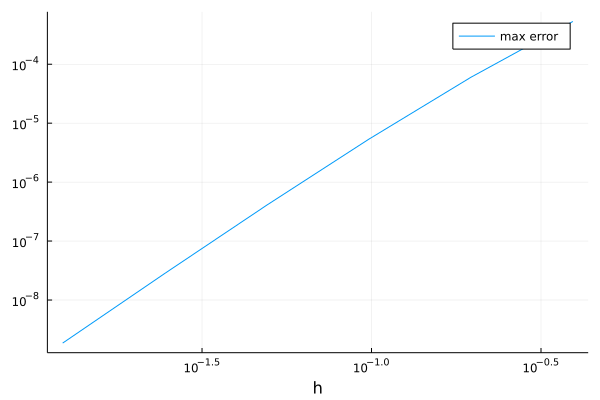

In [6]:
f(x) = cos(x)/sqrt(1+x) # function to interpolate
df(x) = (-sin(x)*sqrt(1+x)-cos(x)/(2*sqrt(1+x)))/(1+x)
a = 0.0; b = pi/2; # interpolation interval
nlist = 2 .^[2:7;]
maxerr = zeros(length(nlist))
for i = 1:length(nlist)
    # println("nlist[$i] = $(nlist[i])")
    n = nlist[i]
    h = (b-a)/n
    tlist = [a:.01*h:b;]
    xs = a .+ h*[0:n;]
    ys = f.(xs)
    cs = CSpline.cspline_nak(xs,ys)
    maxerr[i] = maximum(abs.(CSpline.ev(cs,tlist)-f.(tlist)))
end
println("maxerr = ",maxerr)
using Plots
plot((b-a)./nlist,maxerr,xaxis=:log,yaxis=:log,label="max error",xlabel="h")

In [7]:
slope = -(log(maxerr[6])-log(maxerr[2]))/(log(nlist[6])-log(nlist[2]))

3.7445959984736668

We can also compute Lebesgue constants for cubic splines numerically by following a similar strategy as was used to compute the Lebesgue constants for polynomial interpolation: let $s_i(x)$ be the cubic spline interpolant (say of "not-a-knot" type) of $s_i(x_j)=0$ for $j\neq i$ and $s_i(x_i)=1$. We will take the interpolation points to be equally spaced in the interval $[0,1]$ with $(n+1)$ interpolation points. Then $\Lambda_n = \sum_{i=-0}^n |s_i(x)|$ is the Lebesgue constant for $n$-point cubic spline interpolation. 

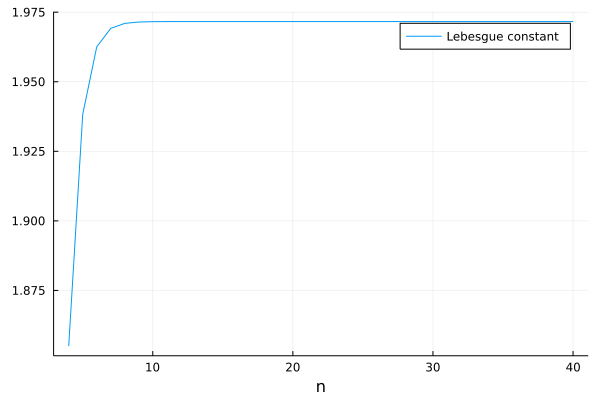

In [5]:
nlist = [4:40;]
Leb_consts = zeros(length(nlist))
for i = 1:length(nlist)
    n = nlist[i]
    tlist = [0:(100*n);]/(100*n)
    slist = zeros(length(tlist))
    xs = [0:n;]/n
    ys = zeros(length(xs))
    for j = 1:length(xs)
        ys[j] = 1
        cs = CSpline.cspline_nak(xs,ys)
        slist += abs.(CSpline.ev(cs,tlist))
        ys[j] = 0
    end
    Leb_consts[i] = maximum(slist)
end
plot(nlist,Leb_consts,xlabel="n",label="Lebesgue constant")

Not only are the Lebesgue constants $\Lambda_n$ bounded independently of $n$, this bound is less than two!